In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hiragino Sans'


ModuleNotFoundError: No module named 'matplotlib'

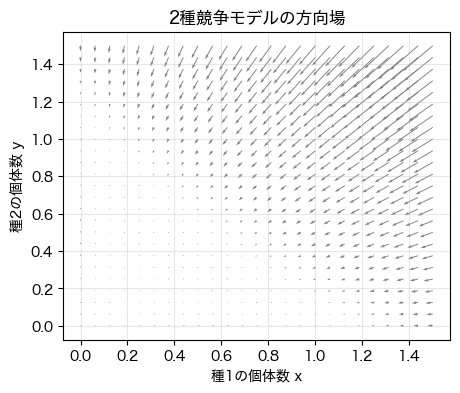

In [35]:
alpha, beta = 1.3, 1.4  # 強い競争
# alpha, beta = 0.6, 0.8  # 強い競争
def competition_rhs(x, y):
    dx = x*(1 - x - alpha*y)
    dy = y*(1 - y - beta*x)
    return dx, dy

x = np.linspace(0, 1.5, 25)
y = np.linspace(0, 1.5, 25)
X, Y = np.meshgrid(x, y)
U, V = competition_rhs(X, Y)

fig, ax = plt.subplots(figsize=(5,4))
ax.quiver(X, Y, U, V, color='gray', angles='xy')
ax.set_xlabel("種1の個体数 x")
ax.set_ylabel("種2の個体数 y")
ax.set_title("2種競争モデルの方向場")
ax.grid(True, alpha=0.3)
plt.savefig(f"7_phase_α={alpha}_β={beta}.png")
plt.show()

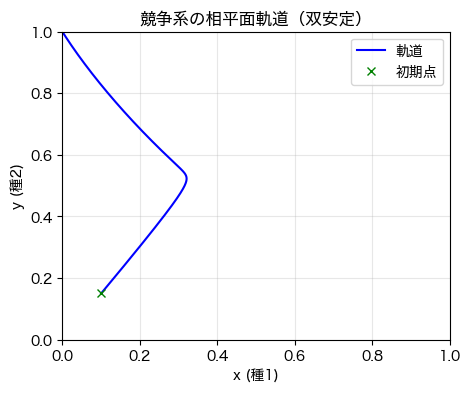

In [33]:
t = np.linspace(0, 50, 2000)
# x0, y0 = 0.5, 0.8
x0, y0 = 0.1, 0.15

def euler_comp(f, x0, y0, t):
    X = np.empty_like(t); Y = np.empty_like(t)
    X[0], Y[0] = x0, y0
    h = t[1]-t[0]
    for k in range(len(t)-1):
        dxdt, dydt = f(X[k], Y[k])
        X[k+1] = X[k] + h*dxdt
        Y[k+1] = Y[k] + h*dydt
    return X, Y

X, Y = euler_comp(competition_rhs, x0, y0, t)

fig, ax = plt.subplots(figsize=(5,4))
ax.plot(X, Y, 'b-', label='軌道')
ax.plot(x0, y0, 'gx', label='初期点')
# ax.plot([0,1],[0,0],'k-'); ax.plot([0,0],[0,1],'k-')  # 軸
ax.set_xlim(0,1); ax.set_ylim(0,1)
ax.set_xlabel("x (種1)")
ax.set_ylabel("y (種2)")
ax.set_title("競争系の相平面軌道（双安定）")
ax.legend(); ax.grid(True, alpha=0.3)
plt.savefig(f"7_orbit_α={alpha}_β={beta}_x0={x0}_y0={y0}.png")
plt.show()